In [29]:
from fastai import *
from fastai.vision import *
from fastai.metrics import accuracy
from fastai.widgets import *
torch.cuda.set_device(0)

In [3]:
path = Path('data/vehicle')
classes = ['vehicle_damaged', 'vehicle_not_damaged']

In [4]:
np.random.seed(42)
data = ImageDataBunch.from_folder(path, train='.', valid_pct=0.2, ds_tfms=get_transforms(), 
                                  size=224, num_workers=4).normalize(imagenet_stats)

In [5]:
# Verify dataset
print(data.classes, data.c, len(data.train_ds), len(data.valid_ds))

['vehicle_damaged', 'vehicle_not_damaged'] 2 116 29


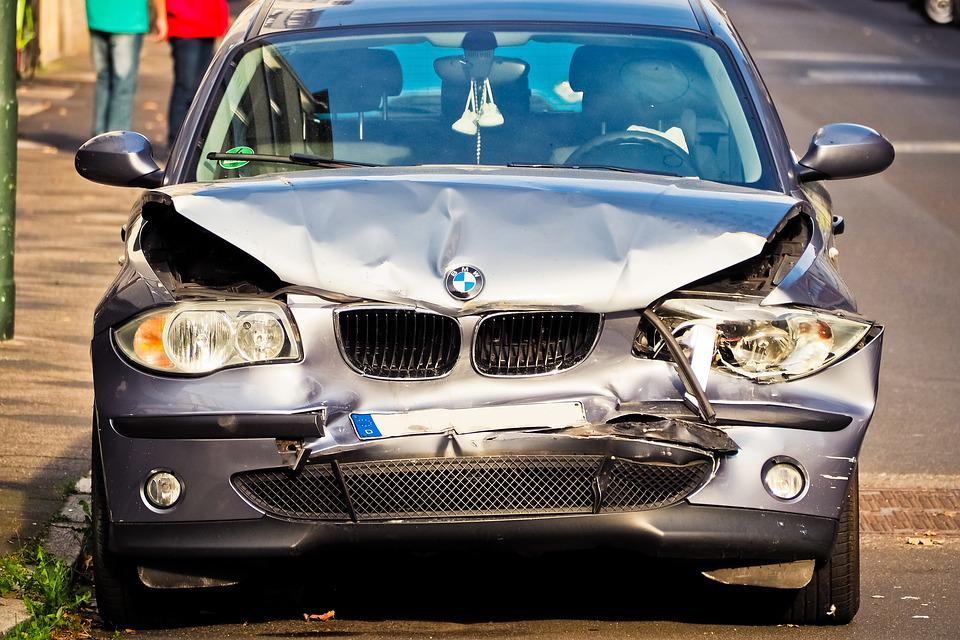

In [7]:
# Check random image
img = open_image(path/'vehicle_damaged'/'damaged-0.jpg')
img

In [8]:
# Model training
learn = cnn_learner(data, models.resnet34, metrics=error_rate)

In [9]:
# Train for 4 epochs
learn.fit_one_cycle(4)

epoch,train_loss,valid_loss,error_rate,time
0,1.463055,1.541502,0.551724,00:17
1,1.584587,1.114851,0.241379,00:14
2,1.262135,0.933976,0.206897,00:14
3,1.107965,0.856648,0.206897,00:14


In [10]:
# Save weights, so we don't need to retrain (this matters when training is time consuming)
learn.save('stage-1')

In [12]:
learn.unfreeze()

In [13]:
# Plot function for finding the best learning rate
learn.lr_find()

LR Finder is complete, type {learner_name}.recorder.plot() to see the graph.


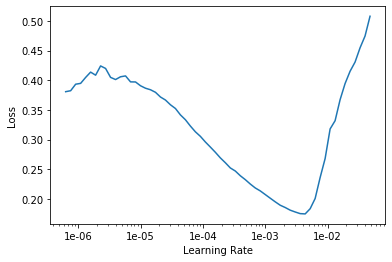

In [14]:
learn.recorder.plot()

In [18]:
learn.fit_one_cycle(8, max_lr=slice(1e-4, 1e-3))

epoch,train_loss,valid_loss,error_rate,time
0,0.150014,0.633759,0.275862,00:13
1,0.334863,0.638455,0.275862,00:13
2,0.262888,0.906051,0.275862,00:13
3,0.224013,1.725569,0.379310,00:14
4,0.207605,2.228754,0.517241,00:13
5,0.179881,2.081093,0.413793,00:13
6,0.180521,1.805639,0.344828,00:14
7,0.169873,1.446101,0.275862,00:13


In [19]:
learn.save('stage-2')

In [21]:
interp = ClassificationInterpretation.from_learner(learn)

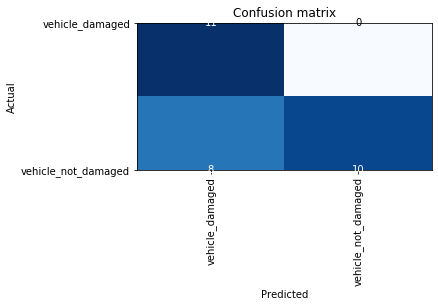

In [35]:
interp.plot_confusion_matrix()

Sequential
Layer (type)         Output Shape         Param #    Trainable 
Conv2d               [64, 112, 112]       9,408      True      
______________________________________________________________________
BatchNorm2d          [64, 112, 112]       128        True      
______________________________________________________________________
ReLU                 [64, 112, 112]       0          False     
______________________________________________________________________
MaxPool2d            [64, 56, 56]         0          False     
______________________________________________________________________
Conv2d               [64, 56, 56]         36,864     True      
______________________________________________________________________
BatchNorm2d          [64, 56, 56]         128        True      
______________________________________________________________________
ReLU                 [64, 56, 56]         0          False     
___________________________________________________

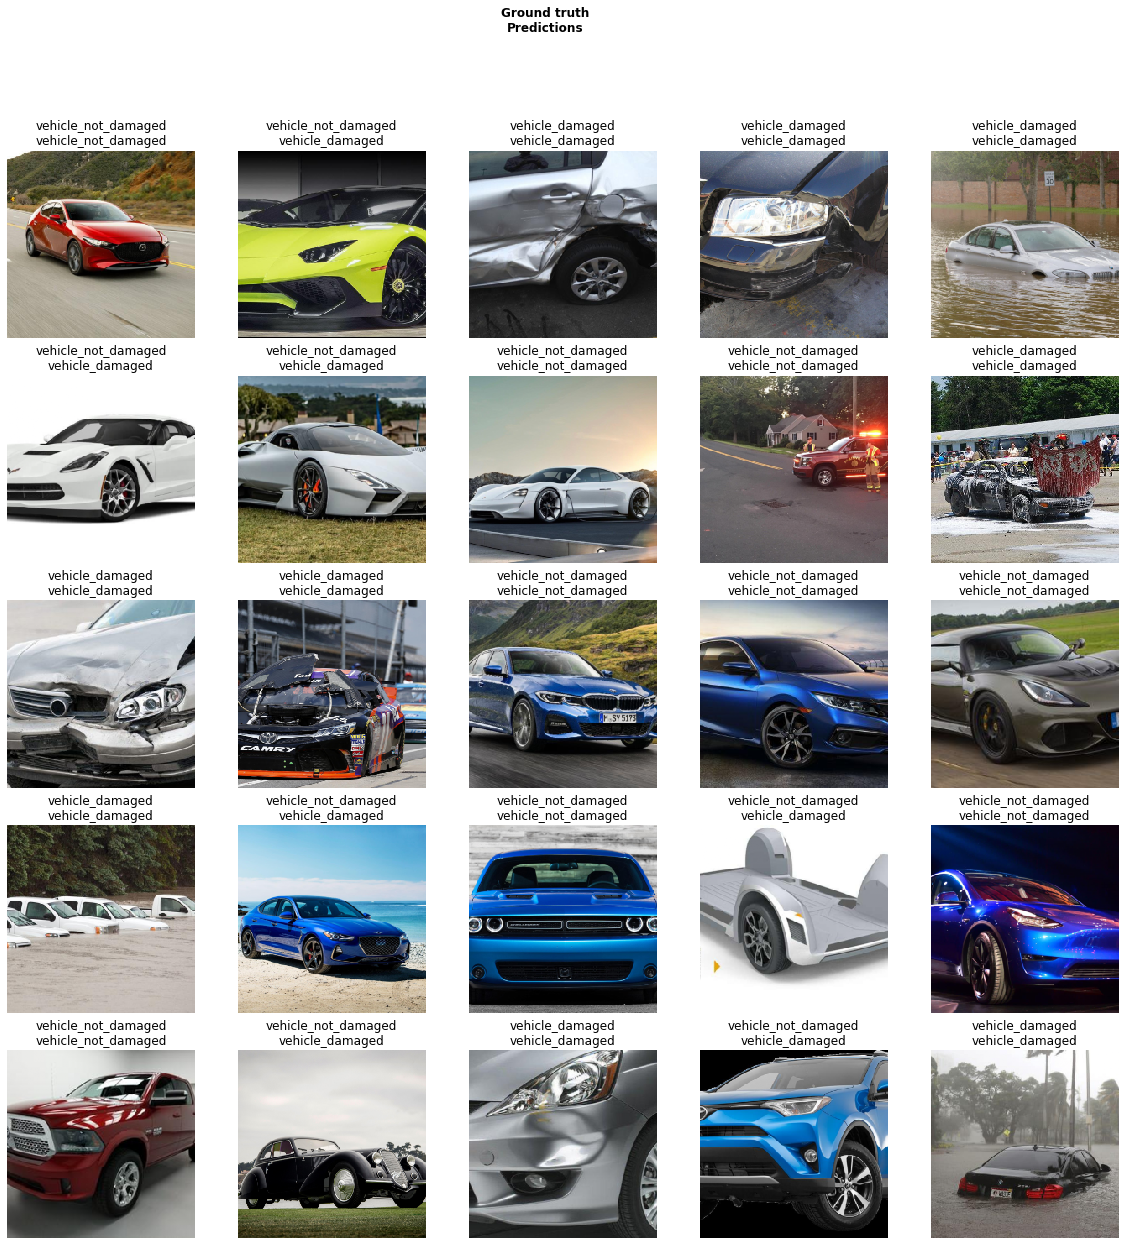

In [31]:
learn.show_results()
learn.()

In [30]:
#Used for cleaning data, already done that process
# db = (ImageList.from_folder(path)
#                   .split_none()
#                   .label_from_folder()
#                   .transform(get_transforms(), size=224)
#                   .databunch())
# ds, idxs = DatasetFormatter().from_toplosses(learn)
# ImageCleaner(ds, idxs, path)

Button(button_style='primary', description='Next Batch', layout=Layout(width='auto'), style=ButtonStyle())